# GAN (Generative Adversarial Networks)

The concept of **Generative Adversarial Networks (GAN)** was proposed by Ian Goodfellow of the University of Montreal.

GAN is a neural network that learns to create synthetic data similar to known input data. Currently, researchers have been able to use GANs to synthesize a series of photos from bedrooms to album covers, and GANs have also shown extraordinary ability to reflect higher-level semantic logic.


These examples are very complicated, but it is not difficult to build a GAN that can generate simple images. In this tutorial, we will learn to build a GAN that analyzes handwritten digital images and learn from scratch how to make it learn to generate new images. In simple words, it is to teach neural networks how to write.

![title](img/gan.gif)

The image above is an example image generated by GAN in this tutorial.

### GAN architecture

![title](img/gan.jpg)

GAN contains two models: 
* **Generative Model.**
* **Discriminative Model.**



The discriminative model is a classifier that judges whether a given picture is a real image from a dataset or a fake image created manually. This is basically a binary classifier in the form of a Convolutional Neural Network (CNN).

**The generative model converts random input values into images through a deconvolution neural network.**

In the course of several training iterations, the weights and biases of the discriminator and generator are trained by back propagation.

**The discriminator learns to find the real digital image from the fake digital images generated by a bunch of generators.**

At the same time, the generator learns how to generate deceptive pictures through the feedback of the discriminator to prevent it from being recognized by the discriminator.



### The Classic idea of GAN

The main inspiration of GAN comes from the idea of zero-sum game in game theory. Through the continuous generation of the network **G (Generator)** and the discriminator network **D (Discriminator)**, **G** then learns the data distribution and generates a realistic image from a random number according to a certain mapping rule.

**G** is a generative network. The input is a random noise and the output is a generated image.

**D** is a discriminative network. The probability of inputting a picture and outputting a real picture is in the range of 0-1.

>**During training, the goal of G is to try to generate real pictures to deceive D.** 

>**The goal of D is to try to distinguish the fake images generated by G. In this way, G and D constitute a dynamic "game process", and the final equilibrium point is the Nash equilibrium point .**

**G's gradient update information comes from discriminator D, not from data samples.**

### Advantages of GAN:

1. GAN is a generative model. Compared with other generative models (Boltzmann machine and GSNs), only back-propagation is used, and no complicated Markov chain is required.


2. Compared with all other models, GAN can produce clearer and true samples

 
3. GAN uses an unsupervised learning method for training, which can be widely used in the fields of unsupervised learning and semi-supervised learning

 
4. Compared to variational autoencoders, GANs do not introduce any deterministic bias, and variational methods introduce deterministic bias because they optimize the lower bound of log-likelihood, not the likelihood itself, which seems to lead to Instances generated by VAEs are more vague than GANs

 
5. Compared with VAE, GANs do not have a variational lower bound. If the discriminator is well trained, the generator can perfectly learn the distribution of training samples. In other words, GANs are progressively consistent, but VAE is biased.

 
6. GAN is applied to some scenarios, such as picture style transfer, super-resolution, image completion, and denoising, which avoids the difficulty of designing the loss function. Regardless of 371, as long as there is a benchmark, the discriminator is directly used. The next one is left to confrontation training.





### Disadvantages of GAN:

1. Training GAN requires Nash equilibrium, sometimes it can be done with gradient descent, sometimes it can't. We haven't found a good way to achieve Nash equilibrium, so training GAN is unstable compared to VAE or PixelRNN, but I think in practice it is more stable than training Boltzmann machines


2. GAN is not suitable for processing discrete forms of data, such as text


3. GAN has problems with **unstable training, disappearance of gradients, and model collapse** (currently resolved)


### Application Scenario

1. GAN itself is a generative model, the most common of which is image generation.


2. GAN also has a place in the field of classification. Replace the discriminator as a classifier, do multiple classification tasks, and the generator assists classifier training.


3. GAN can be combined with reinforcement learning, such as seq-GAN.


4. GAN has better results in **image style transfer, image noise reduction and image super-resolution**.

### Why optimizers in GANs are not commonly used with SGD

1. SGD is easy to oscillate, making GAN training unstable.


2. The purpose of GAN is to find the Nash equilibrium point in the high-dimensional non-convex parameter space. The Nash equilibrium point of GAN is a saddle point, but SGD can only find the local minimum, because SGD solves the problem of finding the minimum value, and GAN is a Game problem.


### Why GANs are not suitable for processing text data

1. Text data is discrete compared to image data, because for text, it is usually necessary to map a word to a high-dimensional vector. The final predicted output is a one-hot vector. Assuming the output of softmax is (0.2, 0.3, 0.1, 0.2, 0.15, 0.05) then becomes onehot is (0, 1, 0, 0, 0, 0), if the softmax output is (0.2, 0.25, 0.2, 0.1, 0.15, 0.1), one-hot It is still (0, 1, 0, 0, 0, 0), so for the generator, G outputs different results but D gives the same discriminant result, and it cannot pass the gradient update information to the generator. G goes, so the final output of D is meaningless.


2. The other is that GAN's loss function is JS divergence, which is not suitable for measuring the distance between undesired distributions. (Although WGAN uses wassertein distance instead of JS divergence, its ability to generate text is still limited. The application of GAN in generating text has seq-GAN and the combination of reinforcement learning)

### Using GAN with MNIST data

We will create a GAN that can generate handwritten numbers, hoping to fool the best classifiers (including humans, of course). 

We will use Google's open source **TensorFlow** to make it easier to train neural networks on the GPU.

### Load MNIST data

First, we need to input a series of real handwritten digital images to the discriminator, which can be regarded as a reference for the discriminator.

MNIST, which is a dataset of handwritten digital pictures, each of which is a single number from 0-9, and each one is an anti-aliasing grayscale image. The dataset contains 70,000 digital images written by Census Bureau staff and high school students collected by the National Institute of Standards and Technology.

Link to MNIST dataset <a href="http://yann.lecun.com/exdb/mnist/" target="_blank">http://yann.lecun.com/exdb/mnist/</a>


Let's start with importing TensorFlow and dataset using the tensorflow function `read_data_sets`.



In [1]:
import tensorflow as tf
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

W0131 17:30:37.854146 10464 deprecation.py:323] From <ipython-input-1-c8b10386149a>:8: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0131 17:30:37.858031 10464 deprecation.py:323] From c:\users\soura\anaconda3\envs\tensor\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0131 17:30:37.861032 10464 deprecation.py:323] From c:\users\soura\anaconda3\envs\tensor\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be remov

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0131 17:30:41.065616 10464 deprecation.py:323] From c:\users\soura\anaconda3\envs\tensor\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0131 17:30:42.501400 10464 deprecation.py:323] From c:\users\soura\anaconda3\envs\tensor\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The MNIST variable we created contains images and labels, and divides the data set into training and validation sets (though we don't need to consider labeling in this tutorial). We can retrieve it by calling next_batch on mnist. Now let's load a picture first.
This image was initially formatted into a column of 784 pixels. We can transform them into 28 × 28 pixel images and view them with PyPlot.

(1, 784)


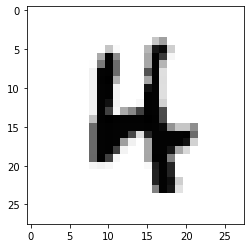

In [2]:
sample_image = mnist.train.next_batch(1)[0]
print(sample_image.shape)

sample_image = sample_image.reshape([28, 28])
plt.imshow(sample_image, cmap='Greys')

#### Discrimination Network

>The discriminator is a convolutional neural network that receives an input image with a picture size of 28 × 28 × 1, and then returns a single scalar value to describe the authenticity of the input image-determine whether it is from the MNIST image set or the generator.

![title](img/dis.jpg)

The structure of the discriminator is closely related to the sample CNN classification model of TensorFlow. It has two convolutional layers with 5 × 5 pixel features, and two fully connected layers that add weights to each pixel in the image.
After the neural network is created, it is usually necessary to initialize the weights and biases. This task can be completed in tf.get_variable. The weights are initialized in the truncated normal distribution, and the biases are initialized at 0.

tf.nn.conv2d () is the standard convolution function in TensorFlow. It contains four parameters: the first parameter is the input image, which is the 28 × 28 pixel picture in this example; the second parameter It is the filter / weight matrix, and eventually you can change the "stride" and "padding" of the convolution. These two parameters control the size of the output image.

In fact, the above is an ordinary simple binary classifier. If you are not new to CNN, you should be familiar with it.




In [3]:
def discriminator(images, reuse=False):
    if (reuse):
        tf.get_variable_scope().reuse_variables()

    # First convolutional and pool layers
    # This finds 32 different 5 x 5 pixel features
    d_w1 = tf.get_variable('d_w1', [5, 5, 1, 32], initializer=tf.truncated_normal_initializer(stddev=0.02))
    d_b1 = tf.get_variable('d_b1', [32], initializer=tf.constant_initializer(0))
    d1 = tf.nn.conv2d(input=images, filter=d_w1, strides=[1, 1, 1, 1], padding='SAME')
    d1 = d1 + d_b1
    d1 = tf.nn.relu(d1)
    d1 = tf.nn.avg_pool(d1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Second convolutional and pool layers
    # This finds 64 different 5 x 5 pixel features
    d_w2 = tf.get_variable('d_w2', [5, 5, 32, 64], initializer=tf.truncated_normal_initializer(stddev=0.02))
    d_b2 = tf.get_variable('d_b2', [64], initializer=tf.constant_initializer(0))
    d2 = tf.nn.conv2d(input=d1, filter=d_w2, strides=[1, 1, 1, 1], padding='SAME')
    d2 = d2 + d_b2
    d2 = tf.nn.relu(d2)
    d2 = tf.nn.avg_pool(d2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # First fully connected layer
    d_w3 = tf.get_variable('d_w3', [7 * 7 * 64, 1024], initializer=tf.truncated_normal_initializer(stddev=0.02))
    d_b3 = tf.get_variable('d_b3', [1024], initializer=tf.constant_initializer(0))
    d3 = tf.reshape(d2, [-1, 7 * 7 * 64])
    d3 = tf.matmul(d3, d_w3)
    d3 = d3 + d_b3
    d3 = tf.nn.relu(d3)

    # Second fully connected layer
    d_w4 = tf.get_variable('d_w4', [1024, 1], initializer=tf.truncated_normal_initializer(stddev=0.02))
    d_b4 = tf.get_variable('d_b4', [1], initializer=tf.constant_initializer(0))
    d4 = tf.matmul(d3, d_w4) + d_b4

    # d4 contains unscaled values
    return d4

![title](img/dis1.jpg)

After defining the discriminator, we need to look back at the generated model. We will build the overall structure of the model based on simple generator code written by Tim O'Shea.

Credits to osh for code <a href="https://github.com/osh/KerasGAN" target="_blank">https://github.com/osh/KerasGAN</a>

In fact, you can think of the generator as a type of inverse convolutional neural network. The discriminator is a typical CNN, which can convert two-dimensional or three-dimensional matrix of pixel values ​​into a probability. However, as a generator, a d-dimensional vector is needed and it needs to be converted into a 28 * 28 image. ReLU and batch normalization are also often used to stabilize the output of each layer.

In this neural network, we used three convolutional layers and interpolation until a 28 * 28 pixel image was formed.

We added a tf.sigmoid () activation function to the output layer, which will squeeze the gray to show the white or black phase, resulting in a sharper image.

In [4]:
def generator(z, batch_size, z_dim):
    g_w1 = tf.get_variable('g_w1', [z_dim, 3136], dtype=tf.float32, initializer=tf.truncated_normal_initializer(stddev=0.02))
    g_b1 = tf.get_variable('g_b1', [3136], initializer=tf.truncated_normal_initializer(stddev=0.02))
    g1 = tf.matmul(z, g_w1) + g_b1
    g1 = tf.reshape(g1, [-1, 56, 56, 1])
    g1 = tf.contrib.layers.batch_norm(g1, epsilon=1e-5, scope='bn1')
    g1 = tf.nn.relu(g1)

    # Generate 50 features
    g_w2 = tf.get_variable('g_w2', [3, 3, 1, z_dim/2], dtype=tf.float32, initializer=tf.truncated_normal_initializer(stddev=0.02))
    g_b2 = tf.get_variable('g_b2', [z_dim/2], initializer=tf.truncated_normal_initializer(stddev=0.02))
    g2 = tf.nn.conv2d(g1, g_w2, strides=[1, 2, 2, 1], padding='SAME')
    g2 = g2 + g_b2
    g2 = tf.contrib.layers.batch_norm(g2, epsilon=1e-5, scope='bn2')
    g2 = tf.nn.relu(g2)
    g2 = tf.image.resize_images(g2, [56, 56])

    # Generate 25 features
    g_w3 = tf.get_variable('g_w3', [3, 3, z_dim/2, z_dim/4], dtype=tf.float32, initializer=tf.truncated_normal_initializer(stddev=0.02))
    g_b3 = tf.get_variable('g_b3', [z_dim/4], initializer=tf.truncated_normal_initializer(stddev=0.02))
    g3 = tf.nn.conv2d(g2, g_w3, strides=[1, 2, 2, 1], padding='SAME')
    g3 = g3 + g_b3
    g3 = tf.contrib.layers.batch_norm(g3, epsilon=1e-5, scope='bn3')
    g3 = tf.nn.relu(g3)
    g3 = tf.image.resize_images(g3, [56, 56])

    # Final convolution with one output channel
    g_w4 = tf.get_variable('g_w4', [1, 1, z_dim/4, 1], dtype=tf.float32, initializer=tf.truncated_normal_initializer(stddev=0.02))
    g_b4 = tf.get_variable('g_b4', [1], initializer=tf.truncated_normal_initializer(stddev=0.02))
    g4 = tf.nn.conv2d(g3, g_w4, strides=[1, 2, 2, 1], padding='SAME')
    g4 = g4 + g_b4
    g4 = tf.sigmoid(g4)

    # Dimensions of g4: batch_size x 28 x 28 x 1
    return g4

### Generate a sample image
After defining the generator and discriminant function, let's now see what examples an untrained generator will generate.

First open TensorFlow and create a placeholder for our generator. The placeholder is of the form None x z_dimensions, and the keyword None means that its value can be determined when the session is run. We usually use None as our first dimension, so our batch size is variable. With the keyword None, there is no need to specify batch_size.



In [5]:
z_dimensions = 100
z_placeholder = tf.placeholder(tf.float32, [None, z_dimensions])

### 

Now we create a variable (generated_image_output) that can hold the output of the generator, and also initialize the random noise vector of the input. The np.random.normal () function has three parameters. The first two define the mean and standard deviation of the normal distribution, and the last one defines the shape of the vector (1 x 100).

In [6]:
generated_image_output = generator(z_placeholder, 1, z_dimensions)
z_batch = np.random.normal(0, 1, [1, z_dimensions])

The sess.run () function takes two parameters. The first is called the "get" parameter, which defines the values ​​you are interested in calculating. In this case, we want to see what the generator will output. If you look at the last snippet, you will see that the output of the generated function is stored in generated_image_output, and we will use generated_image_output as the first parameter.

The second parameter is equivalent to an input dictionary, which can replace the calculation graph at runtime, which is what we need to fill in the placeholder. In our example, we need to enter the z_batch variable into the previously defined z_placeholder, and then rescale the picture to 28 * 28 pixels in PyPlot.

It looks like noise, right. Now we need to train to generate weights and biases in the network and turn random numbers into identifiable numbers. Let's look at the loss function and optimization again.

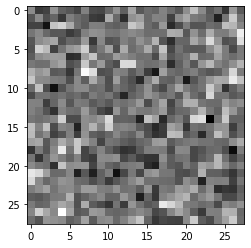

In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    generated_image = sess.run(generated_image_output,
                                feed_dict={z_placeholder: z_batch})
    generated_image = generated_image.reshape([28, 28])
    plt.imshow(generated_image, cmap='Greys')

### Training GAN

Building and debugging a GAN is complicated in that it has two loss functions: one encourages the generator to create a better image, and the other encourages the discriminator to distinguish which is the true image and which is generated by the generator.

We train both the generator and the discriminator. When the discriminator is able to distinguish where the image comes from, the generator can also better adjust its weight and bias to generate a more fake image.

The inputs and outputs of this network are as follows:

In [8]:
tf.reset_default_graph()
batch_size = 50

z_placeholder = tf.placeholder(tf.float32, [None, z_dimensions], name='z_placeholder') 
# z_placeholder is for feeding input noise to the generator

x_placeholder = tf.placeholder(tf.float32, shape = [None,28,28,1], name='x_placeholder') 
# x_placeholder is for feeding input images to the discriminator

Gz = generator(z_placeholder, batch_size, z_dimensions) 
# Gz holds the generated images

Dx = discriminator(x_placeholder) 
# Dx will hold discriminator prediction probabilities
# for the real MNIST images

Dg = discriminator(Gz, reuse=True)
# Dg will hold discriminator prediction probabilities for generated images

So let's first think about what we need to get in the network. The goal of the discriminator is to correctly mark the MNIST image as true, and the flag generated by the discriminator is false. We will calculate two losses for the discriminator: the loss of Dx and 1 (representing the real image in MNIST), and the loss of Dg and 0 (representing the generated image). We run this function on the tf.nn.sigmoid_cross_entropy_with_logits () function in TensorFlow to calculate the cross-entropy loss between Dx and 0 and Dg and 1.
sigmoid_cross_entropy_with_logits runs at unscaled values, not probability values ​​between 0 and 1. Take a look at the last line of the discriminator: there is no softmax or sigmoid function layer here. If the discriminator is "saturated" or there is enough confidence to return 0 after giving the generated image, then the gradient descent of the discriminator will be rendered useless.

The tf.reduce_mean () function selects the average of all components in the matrix returned by the cross-entropy function. This is a way to reduce the loss to a single scalar value, not a vector or matrix.

In [11]:
d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = Dx, logits = tf.ones_like(Dx)))
d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = Dg, logits = tf.zeros_like(Dg)))

Now let's set the generator's loss function. We want the image generated by the network to fool the discriminator: When the input generates the image, the discriminator can output a value close to 1 to calculate the loss between Dg and 1.

In [13]:
g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = Dg, logits = tf.ones_like(Dg)))

Now that we have the loss function, we need to define an optimization program. The optimizer that generates the network only needs to upgrade the weights of the generator, not the discriminator. Similarly, when training the discriminator, we need to fix the weight of the generator.


To make these look different, we need to create two variable lists, one is the weight and bias of the discriminator, and the other is the weight and bias of the generator. That's why it takes a lot of thought when naming TensorFlow variables.

In [14]:
tvars = tf.trainable_variables()

d_vars = [var for var in tvars if 'd_' in var.name]
g_vars = [var for var in tvars if 'g_' in var.name]

print([v.name for v in d_vars])
print([v.name for v in g_vars])

['d_w1:0', 'd_b1:0', 'd_w2:0', 'd_b2:0', 'd_w3:0', 'd_b3:0', 'd_w4:0', 'd_b4:0']
['g_w1:0', 'g_b1:0', 'g_w2:0', 'g_b2:0', 'g_w3:0', 'g_b3:0', 'g_w4:0', 'g_b4:0']


Next, you need to develop two optimizers. We generally choose the Adam optimization algorithm, which uses adaptive learning rate and momentum. We call Adam's minimum function and specify the variables we want to update-that is, the generator weight and bias when we train the generator, and the discriminator weight and bias when we train the discriminator.


We set up two different training schemes for the discriminator: one is to train the discriminator with real images, and the other is to train it with the generated "fake image". Sometimes it is necessary to use different learning rates, or use them individually to regulate other aspects of learning.

Code link <a href="https://github.com/jonbruner/ezgan" target="_blank">https://github.com/jonbruner/ezgan</a>

In [19]:
with tf.variable_scope('fake-optimizer',reuse=tf.AUTO_REUSE):
  d_trainer_fake = tf.train.AdamOptimizer(0.0003).minimize(d_loss_fake, var_list=d_vars)

with tf.variable_scope('real-optimizer',reuse=tf.AUTO_REUSE):
  d_trainer_real = tf.train.AdamOptimizer(0.0003).minimize(d_loss_real, var_list=d_vars)

with tf.variable_scope('optimizer',reuse=tf.AUTO_REUSE):
  g_trainer = tf.train.AdamOptimizer(0.0001).minimize(g_loss, var_list=g_vars)

Converging GANs can be tricky and often requires a long training. You can use TensorBoard to track the training process: it can use graphs to describe scalar attributes (such as losses), display sample images during training, and display the topology of neural networks.

In [20]:
tf.summary.scalar('Generator_loss', g_loss)
tf.summary.scalar('Discriminator_loss_real', d_loss_real)
tf.summary.scalar('Discriminator_loss_fake', d_loss_fake)

images_for_tensorboard = generator(z_placeholder, batch_size, z_dimensions)
tf.summary.image('Generated_images', images_for_tensorboard, 5)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)

Now iterate over a few simple raw trainings of the discriminator, this method helps to form gradients that are useful for the generator.


After that we proceed with the main training cycle. When training the generator, we need to input a random z vector into the generator and pass its output to the discriminator (this is the Dg variable we defined earlier). The weight and bias of the generator will be changed, mainly to generate images that can fool the discriminator.


To train the discriminator, we will provide it with a set of positive examples from the MNIST dataset, and train the discriminator again with the generated images, using them as negative examples.


Because training GANs usually takes a long time, we recommend that if you are using this tutorial for the first time, it is recommended not to run this code block first. But you can first execute the following code block and let it generate a pre-trained model.



If you want to run this code block yourself, be prepared to wait a long time: it takes about 3 hours to run on a relatively fast GPU, and it may take 10 times longer on a desktop CPU.


Therefore, it is recommended that you skip the above and directly execute the following cell. It loads a model that we trained for 10 hours on a high-speed GPU machine, and you can experiment with the trained GAN.

dLossReal: 1.3123244 dLossFake: 0.6931472
dLossReal: -27160.875 dLossFake: 0.6931472
dLossReal: -881424.2 dLossFake: 0.6931472
Iteration: 0 at 2020-01-31 18:02:08.803524


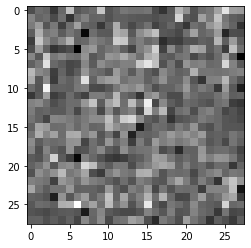

Estimate: [[16300906.]]
Iteration: 100 at 2020-01-31 18:02:34.228122


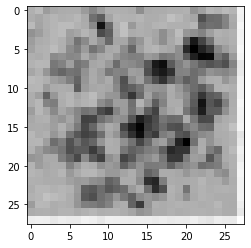

Estimate: [[64393364.]]
Iteration: 200 at 2020-01-31 18:02:59.629625


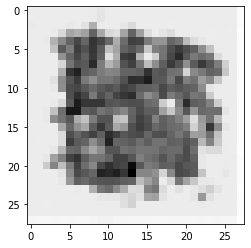

Estimate: [[1.8657654e+08]]
Iteration: 300 at 2020-01-31 18:03:25.107552


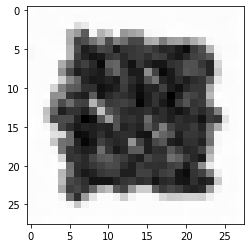

Estimate: [[4.426892e+08]]
Iteration: 400 at 2020-01-31 18:03:50.716514


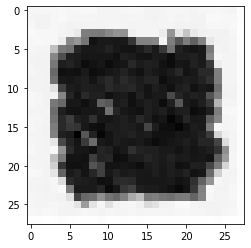

Estimate: [[9.0829414e+08]]
Iteration: 500 at 2020-01-31 18:04:16.338041


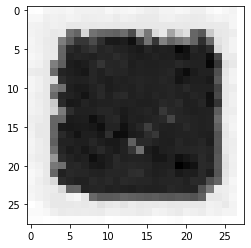

Estimate: [[1.6527158e+09]]
Iteration: 600 at 2020-01-31 18:04:42.189523


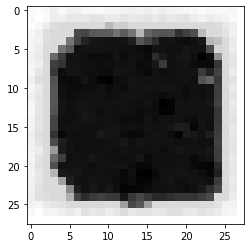

Estimate: [[2.756604e+09]]
Iteration: 700 at 2020-01-31 18:05:07.666967


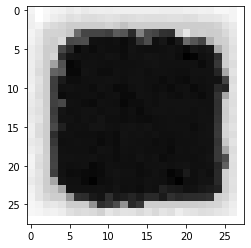

Estimate: [[4.304758e+09]]
Iteration: 800 at 2020-01-31 18:05:33.269810


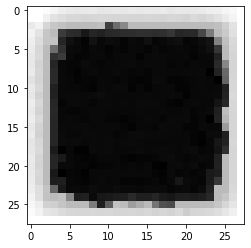

Estimate: [[6.4047104e+09]]
Iteration: 900 at 2020-01-31 18:05:58.736810


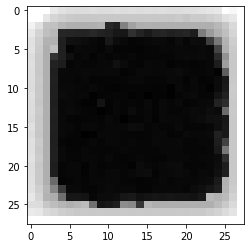

Estimate: [[9.098018e+09]]
Iteration: 1000 at 2020-01-31 18:06:24.212210


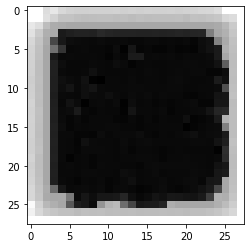

Estimate: [[1.2498501e+10]]
Iteration: 1100 at 2020-01-31 18:06:49.677794


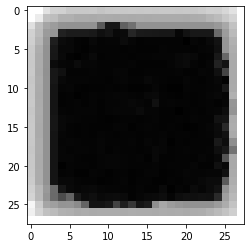

Estimate: [[1.6707686e+10]]
Iteration: 1200 at 2020-01-31 18:07:15.421802


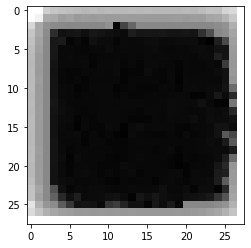

Estimate: [[2.1823394e+10]]
Iteration: 1300 at 2020-01-31 18:07:42.941497


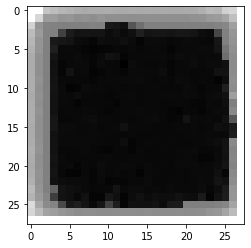

Estimate: [[2.7854588e+10]]
Iteration: 1400 at 2020-01-31 18:08:08.725911


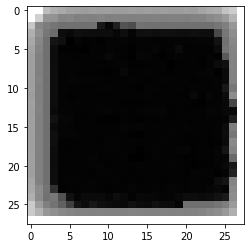

Estimate: [[3.4946085e+10]]
Iteration: 1500 at 2020-01-31 18:08:34.203197


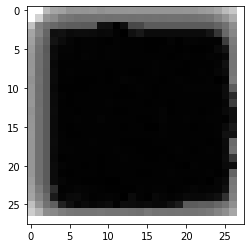

Estimate: [[4.3206898e+10]]
Iteration: 1600 at 2020-01-31 18:08:59.790888


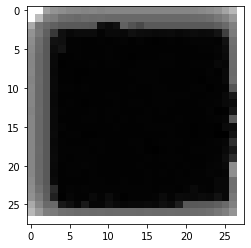

Estimate: [[5.2618035e+10]]
Iteration: 1700 at 2020-01-31 18:09:25.487910


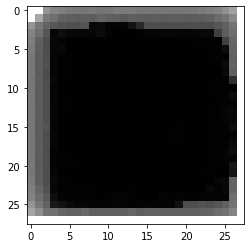

Estimate: [[6.3405216e+10]]
Iteration: 1800 at 2020-01-31 18:09:50.985137


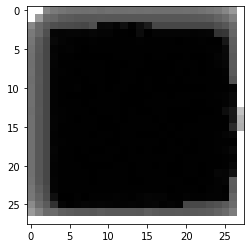

Estimate: [[7.547626e+10]]
Iteration: 1900 at 2020-01-31 18:10:16.635388


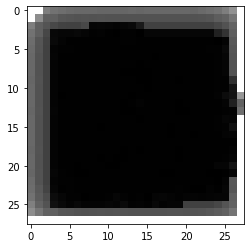

Estimate: [[8.899206e+10]]
Iteration: 2000 at 2020-01-31 18:10:42.281203


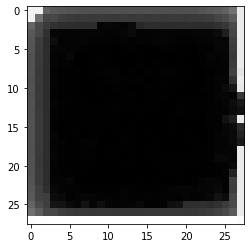

Estimate: [[1.0475885e+11]]
Iteration: 2100 at 2020-01-31 18:11:07.752711


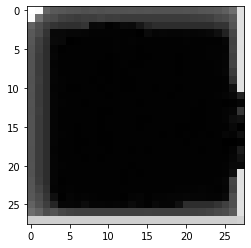

Estimate: [[1.2182218e+11]]
Iteration: 2200 at 2020-01-31 18:11:33.432709


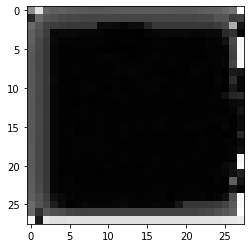

Estimate: [[1.4052742e+11]]
Iteration: 2300 at 2020-01-31 18:11:59.362210


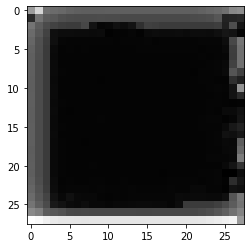

Estimate: [[1.609456e+11]]
Iteration: 2400 at 2020-01-31 18:12:25.291709


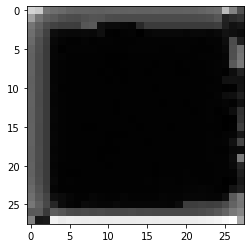

Estimate: [[1.8317528e+11]]
Iteration: 2500 at 2020-01-31 18:12:51.507737


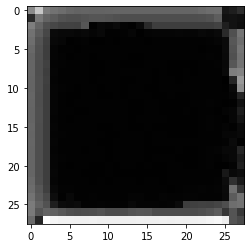

Estimate: [[2.0725858e+11]]
Iteration: 2600 at 2020-01-31 18:13:17.637238


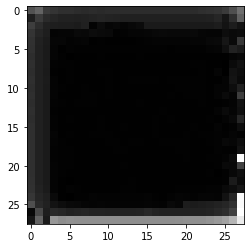

Estimate: [[2.3394088e+11]]
Iteration: 2700 at 2020-01-31 18:13:43.684769


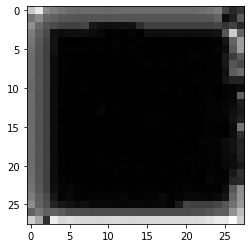

Estimate: [[2.6227674e+11]]
Iteration: 2800 at 2020-01-31 18:14:09.873266


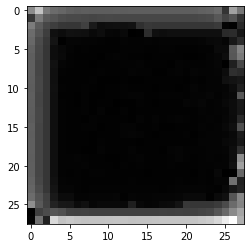

Estimate: [[2.9270042e+11]]
Iteration: 2900 at 2020-01-31 18:14:35.944798


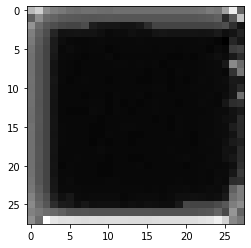

Estimate: [[3.2504843e+11]]
Iteration: 3000 at 2020-01-31 18:15:02.333857


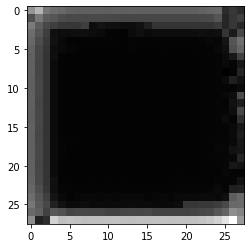

Estimate: [[3.5988645e+11]]
Iteration: 3100 at 2020-01-31 18:15:28.520857


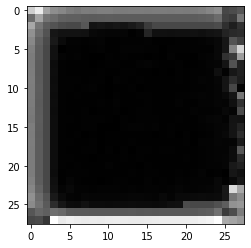

Estimate: [[3.9722372e+11]]
Iteration: 3200 at 2020-01-31 18:15:54.751870


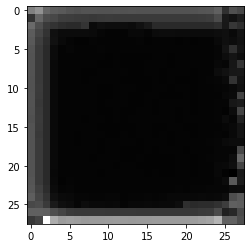

Estimate: [[4.365732e+11]]
Iteration: 3300 at 2020-01-31 18:16:20.919737


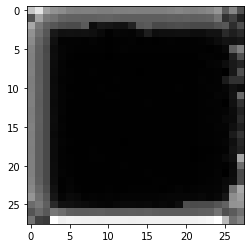

Estimate: [[4.785809e+11]]
Iteration: 3400 at 2020-01-31 18:16:47.130865


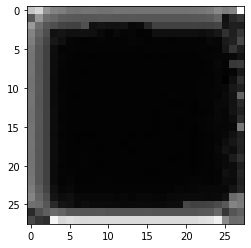

Estimate: [[5.2327897e+11]]
Iteration: 3500 at 2020-01-31 18:17:14.237078


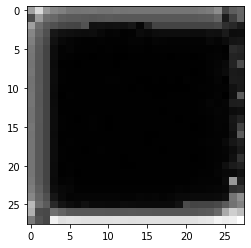

Estimate: [[5.7069935e+11]]
Iteration: 3600 at 2020-01-31 18:17:40.688269


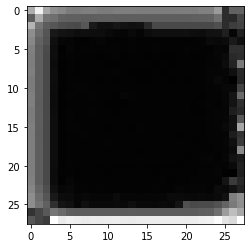

Estimate: [[6.206297e+11]]
Iteration: 3700 at 2020-01-31 18:18:07.023743


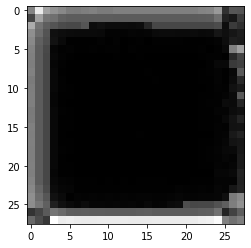

Estimate: [[6.73673e+11]]
Iteration: 3800 at 2020-01-31 18:18:33.256365


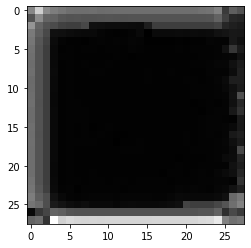

Estimate: [[7.294135e+11]]
Iteration: 3900 at 2020-01-31 18:18:59.505878


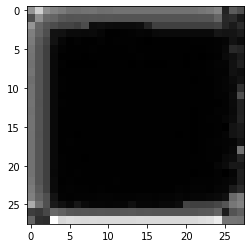

Estimate: [[7.8843825e+11]]
Iteration: 4000 at 2020-01-31 18:19:25.948757


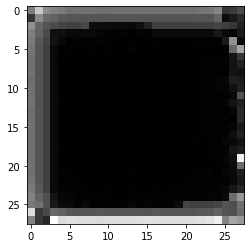

Estimate: [[8.5040634e+11]]
Iteration: 4100 at 2020-01-31 18:19:52.572887


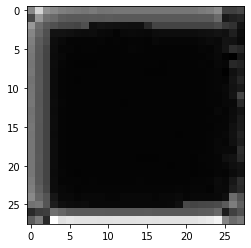

Estimate: [[9.149811e+11]]
Iteration: 4200 at 2020-01-31 18:20:18.803053


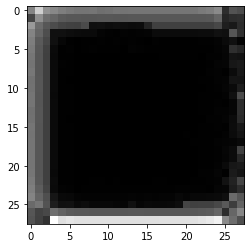

Estimate: [[9.832966e+11]]
Iteration: 4300 at 2020-01-31 18:20:45.200229


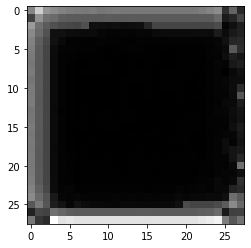

Estimate: [[1.0544081e+12]]
Iteration: 4400 at 2020-01-31 18:21:11.742319


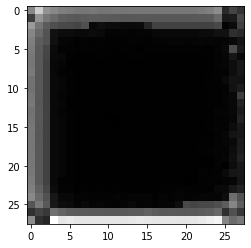

Estimate: [[1.128737e+12]]
Iteration: 4500 at 2020-01-31 18:21:37.366362


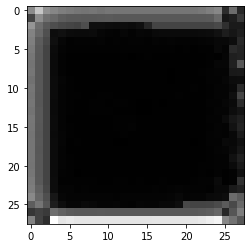

Estimate: [[1.2064212e+12]]
Iteration: 4600 at 2020-01-31 18:22:03.111728


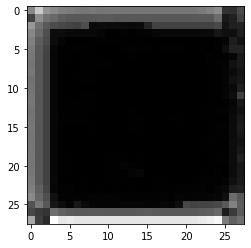

Estimate: [[1.2878559e+12]]
Iteration: 4700 at 2020-01-31 18:22:28.741175


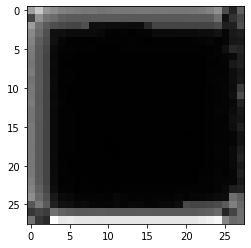

Estimate: [[1.3728593e+12]]
Iteration: 4800 at 2020-01-31 18:22:54.391399


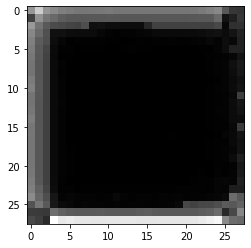

Estimate: [[1.4623527e+12]]
Iteration: 4900 at 2020-01-31 18:23:20.073000


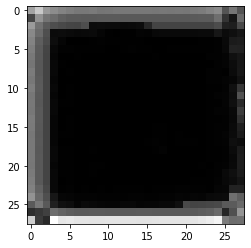

Estimate: [[1.5546055e+12]]
Iteration: 5000 at 2020-01-31 18:23:45.741618


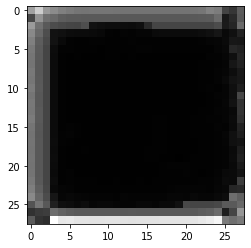

Estimate: [[1.6514792e+12]]
Iteration: 5100 at 2020-01-31 18:24:12.228984


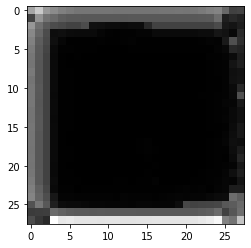

Estimate: [[1.7519278e+12]]
Iteration: 5200 at 2020-01-31 18:24:39.138040


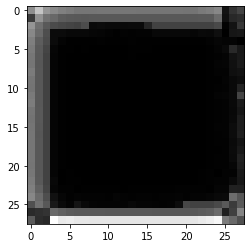

Estimate: [[1.8552931e+12]]
Iteration: 5300 at 2020-01-31 18:25:06.216039


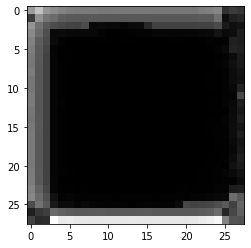

Estimate: [[1.963856e+12]]
Iteration: 5400 at 2020-01-31 18:25:32.920913


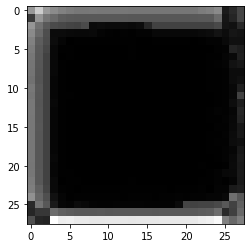

Estimate: [[2.0756895e+12]]
Iteration: 5500 at 2020-01-31 18:25:59.494875


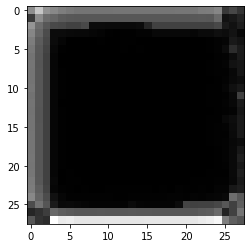

Estimate: [[2.1927469e+12]]
Iteration: 5600 at 2020-01-31 18:26:27.674013


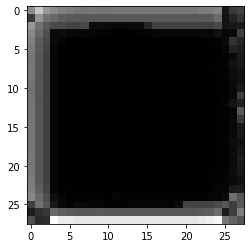

Estimate: [[2.3136696e+12]]
Iteration: 5700 at 2020-01-31 18:26:55.051908


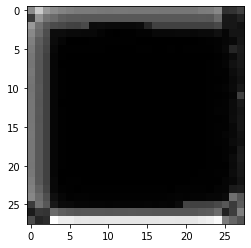

Estimate: [[2.438244e+12]]
Iteration: 5800 at 2020-01-31 18:27:21.388120


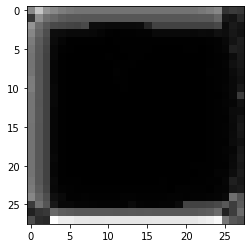

Estimate: [[2.5678426e+12]]
Iteration: 5900 at 2020-01-31 18:27:47.810451


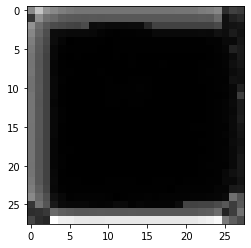

Estimate: [[2.701929e+12]]
Iteration: 6000 at 2020-01-31 18:28:14.424829


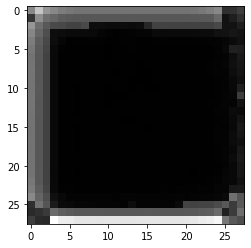

Estimate: [[2.840659e+12]]
Iteration: 6100 at 2020-01-31 18:28:40.740641


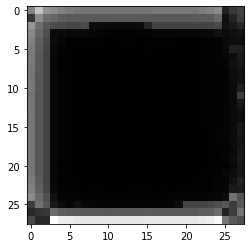

Estimate: [[2.984901e+12]]
Iteration: 6200 at 2020-01-31 18:29:07.751858


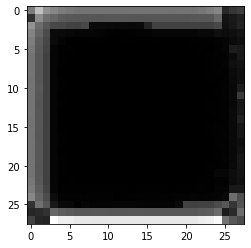

Estimate: [[3.1339756e+12]]
Iteration: 6300 at 2020-01-31 18:29:34.816979


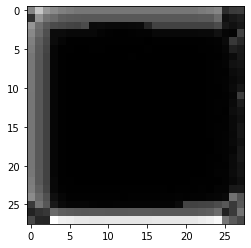

Estimate: [[3.2878709e+12]]
Iteration: 6400 at 2020-01-31 18:30:02.306538


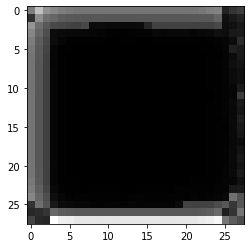

Estimate: [[3.4468664e+12]]
Iteration: 6500 at 2020-01-31 18:30:29.193817


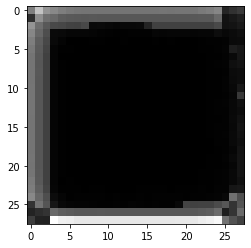

Estimate: [[3.6108682e+12]]
Iteration: 6600 at 2020-01-31 18:30:56.962994


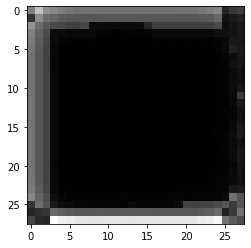

Estimate: [[3.7787947e+12]]
Iteration: 6700 at 2020-01-31 18:31:23.875634


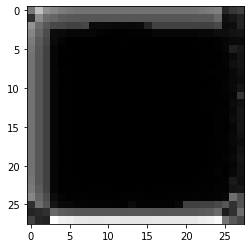

Estimate: [[3.9526757e+12]]
Iteration: 6800 at 2020-01-31 18:31:50.292971


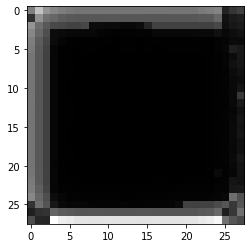

Estimate: [[4.1314427e+12]]
Iteration: 6900 at 2020-01-31 18:32:16.772875


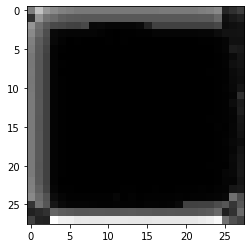

Estimate: [[4.3156853e+12]]
Iteration: 7000 at 2020-01-31 18:32:43.276865


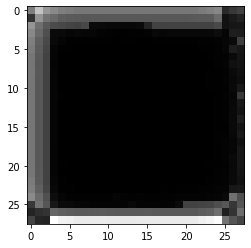

Estimate: [[4.506828e+12]]
Iteration: 7100 at 2020-01-31 18:33:09.732227


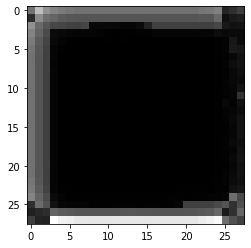

Estimate: [[4.7047094e+12]]
Iteration: 7200 at 2020-01-31 18:33:36.406308


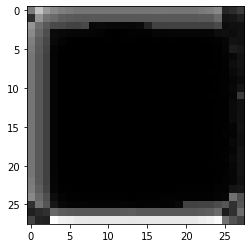

Estimate: [[4.905317e+12]]
Iteration: 7300 at 2020-01-31 18:34:03.539497


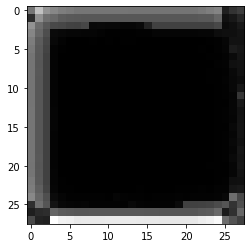

Estimate: [[5.1128005e+12]]
Iteration: 7400 at 2020-01-31 18:34:30.489757


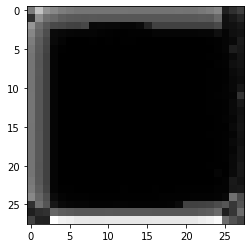

Estimate: [[5.3258014e+12]]
Iteration: 7500 at 2020-01-31 18:34:57.921012


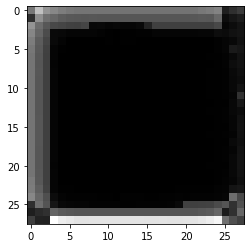

Estimate: [[5.5452935e+12]]
Iteration: 7600 at 2020-01-31 18:35:24.851120


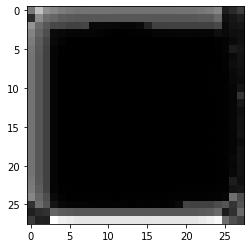

Estimate: [[5.770435e+12]]
Iteration: 7700 at 2020-01-31 18:35:51.769540


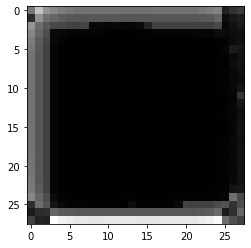

Estimate: [[6.0022566e+12]]
Iteration: 7800 at 2020-01-31 18:36:19.002954


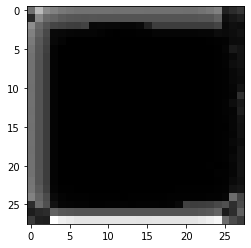

Estimate: [[6.240896e+12]]
Iteration: 7900 at 2020-01-31 18:36:45.784860


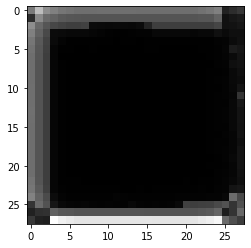

Estimate: [[6.4855993e+12]]
Iteration: 8000 at 2020-01-31 18:37:12.575253


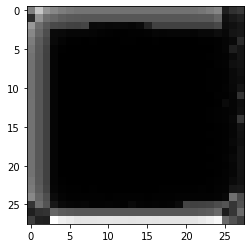

Estimate: [[6.7368145e+12]]
Iteration: 8100 at 2020-01-31 18:37:40.064843


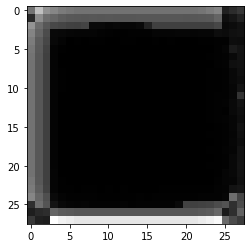

Estimate: [[6.995027e+12]]
Iteration: 8200 at 2020-01-31 18:38:07.086229


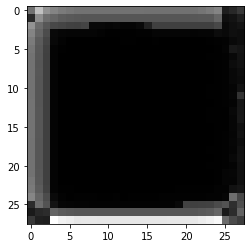

Estimate: [[7.257752e+12]]
Iteration: 8300 at 2020-01-31 18:38:33.974390


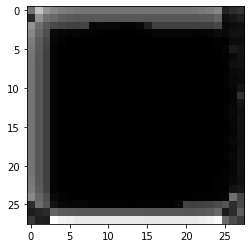

Estimate: [[7.529991e+12]]
Iteration: 8400 at 2020-01-31 18:39:00.719368


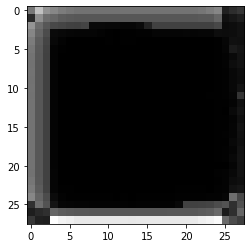

Estimate: [[7.8086705e+12]]
Iteration: 8500 at 2020-01-31 18:39:27.166934


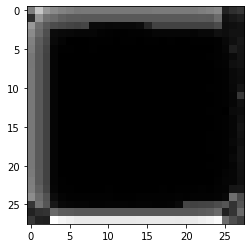

Estimate: [[8.093501e+12]]
Iteration: 8600 at 2020-01-31 18:39:53.127941


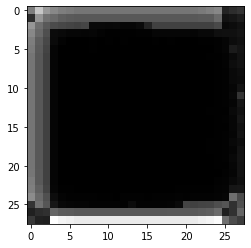

Estimate: [[8.386173e+12]]
Iteration: 8700 at 2020-01-31 18:40:19.856394


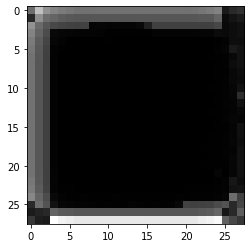

Estimate: [[8.685157e+12]]


KeyboardInterrupt: 

In [21]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Pre-train discriminator
for i in range(300):
    z_batch = np.random.normal(0, 1, size=[batch_size, z_dimensions])
    real_image_batch = mnist.train.next_batch(batch_size)[0].reshape([batch_size, 28, 28, 1])
    _, __, dLossReal, dLossFake = sess.run([d_trainer_real, d_trainer_fake, d_loss_real, d_loss_fake],
                                           {x_placeholder: real_image_batch, z_placeholder: z_batch})

    if(i % 100 == 0):
        print("dLossReal:", dLossReal, "dLossFake:", dLossFake)

# Train generator and discriminator together
for i in range(100000):
    real_image_batch = mnist.train.next_batch(batch_size)[0].reshape([batch_size, 28, 28, 1])
    z_batch = np.random.normal(0, 1, size=[batch_size, z_dimensions])

    # Train discriminator on both real and fake images
    _, __, dLossReal, dLossFake = sess.run([d_trainer_real, d_trainer_fake, d_loss_real, d_loss_fake],
                                           {x_placeholder: real_image_batch, z_placeholder: z_batch})

    # Train generator
    z_batch = np.random.normal(0, 1, size=[batch_size, z_dimensions])
    _ = sess.run(g_trainer, feed_dict={z_placeholder: z_batch})

    if i % 10 == 0:
        # Update TensorBoard with summary statistics
        z_batch = np.random.normal(0, 1, size=[batch_size, z_dimensions])
        summary = sess.run(merged, {z_placeholder: z_batch, x_placeholder: real_image_batch})
        writer.add_summary(summary, i)

    if i % 100 == 0:
        # Every 100 iterations, show a generated image
        print("Iteration:", i, "at", datetime.datetime.now())
        z_batch = np.random.normal(0, 1, size=[1, z_dimensions])
        generated_images = generator(z_placeholder, 1, z_dimensions)
        images = sess.run(generated_images, {z_placeholder: z_batch})
        plt.imshow(images[0].reshape([28, 28]), cmap='Greys')
        plt.show()

        # Show discriminator's estimate
        im = images[0].reshape([1, 28, 28, 1])
        result = discriminator(x_placeholder)
        estimate = sess.run(result, {x_placeholder: im})
        print("Estimate:", estimate)

#### Not easy to train


As we all know, training GANs is difficult. Without the correct hyperparameters, network architecture, and training process, the discriminator will suppress the generator.

In [ ]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, 'pretrained-model/pretrained_gan.ckpt')
    z_batch = np.random.normal(0, 1, size=[10, z_dimensions])
    z_placeholder = tf.placeholder(tf.float32, [None, z_dimensions], name='z_placeholder') 
    generated_images = generator(z_placeholder, 10, z_dimensions)
    images = sess.run(generated_images, {z_placeholder: z_batch})
    for i in range(10):
        plt.imshow(images[i].reshape([28, 28]), cmap='Greys')
        plt.show()